In [92]:
from lanelet2.core import BasicPoint2d
from core.scenario import Scenario, Frame, AgentState
from core.feature_extraction import FeatureExtractor
from core.data_processing import get_dataset
from core.base import get_img_dir 
from core.lanelet_helpers import LaneletHelpers
from igp2.maneuver import FollowLane, SwitchLane, Turn, ManeuverConfig, GiveWay
from igp2.util import get_curvature
import matplotlib.pyplot as plt
import numpy as np

In [2]:
scenario = Scenario.load('../scenario_config/heckstrasse.json')

In [84]:
episode = scenario.load_episode(0)

In [87]:
agent = episode.agents[0]

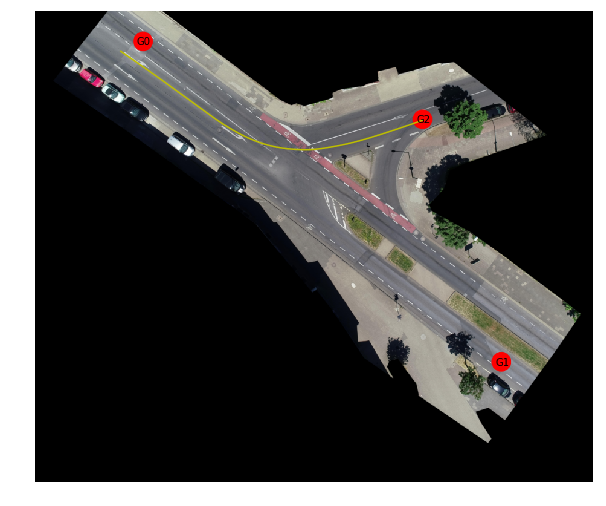

In [93]:
plt.figure(figsize=(10, 10))
scenario.plot(draw_road_markings=False)
plt.axis('off')
plt.xlim((0, 90))
agent.plot_trajectory(color='y')
plt.savefig(get_img_dir() + 'heckstrasse_example.eps', dpi=300)

In [4]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 13.8, -10.0, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
agent_id = 0
config = ManeuverConfig({'termination_point': (76.5, -57.3),
                         'initial_lanelet_id': -1770699,
                         'final_lanelet_id': -1770828})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)

path, velocity = maneuver.path, maneuver.velocity

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


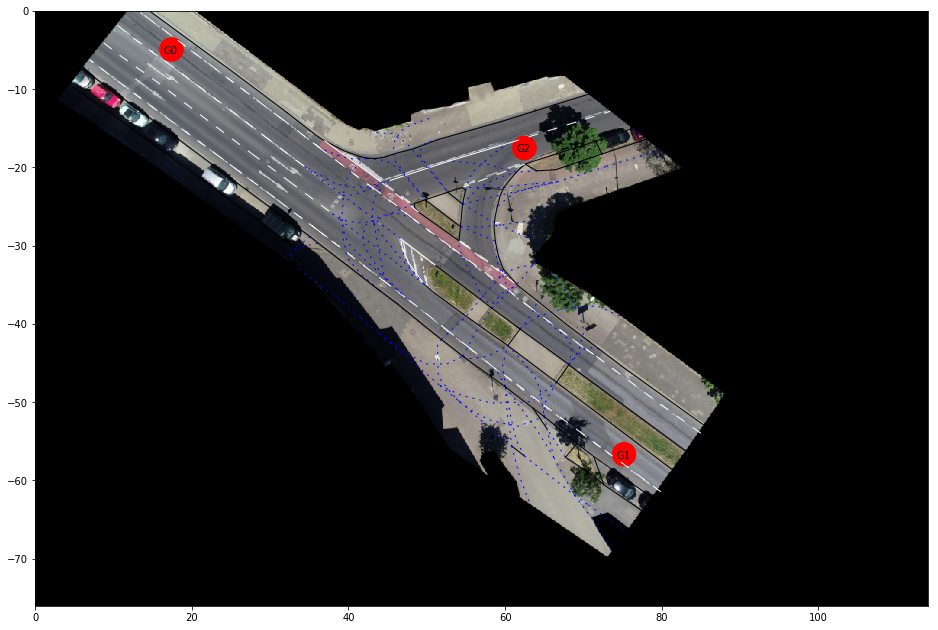

In [5]:
x = path[:, 0]
y = path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
#plt.plot(x, y)

In [6]:
curvature = get_curvature(path)

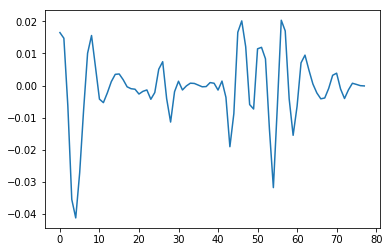

In [7]:
plt.plot(curvature)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


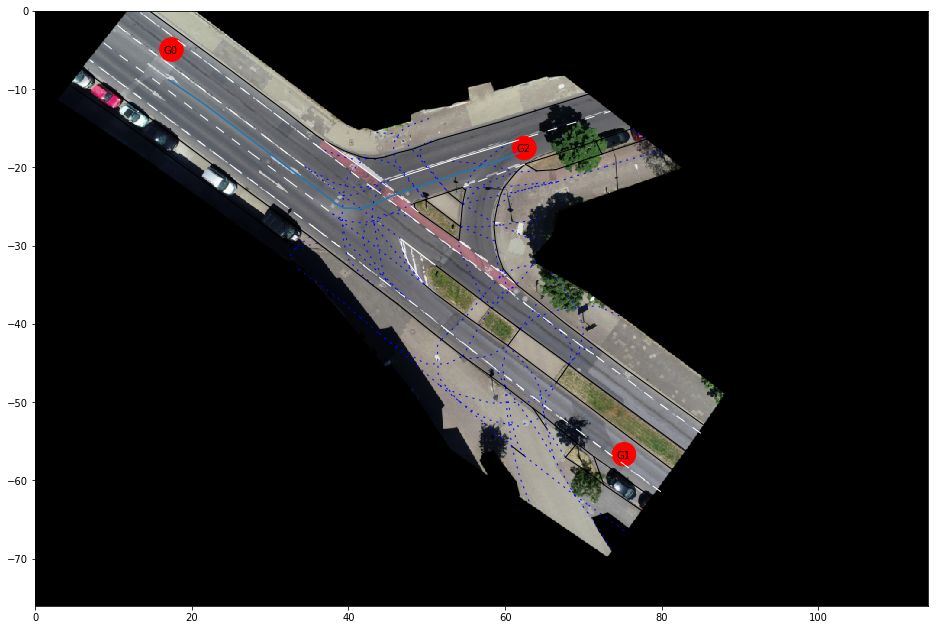

In [8]:
feature_extractor = FeatureExtractor(scenario.lanelet_map)
frame = Frame(0)
state = AgentState(0, 17.01, -8.83, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
config = ManeuverConfig({'termination_point': (61.83, -18.49),
                         'initial_lanelet_id': -1770700,
                         'final_lanelet_id': -1770707})
maneuver = FollowLane(agent_id, frame, feature_extractor, config)


x = maneuver.path[:, 0]
y = maneuver.path[:, 1]
plt.figure(figsize=(16, 16))
scenario.plot()
plt.plot(x, y)

In [9]:
from igp2.macro_action import ContinueLane

In [10]:
agent_id = 0
frame = Frame(0)
state = AgentState(0, 21.2, -15.4, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
goal = scenario.config.goals[1]
macro = ContinueLane(agent_id, frame, feature_extractor, goal)
follow_maneuver = macro.maneuvers[0]

In [11]:
config = ManeuverConfig({'termination_point': (37.9, -24.4),
                         'initial_lanelet_id': -1770700,
                         'final_lanelet_id': -1770712})
switch_maneuver = SwitchLane(agent_id, frame, feature_extractor, config)

frame = Frame(0)
state = AgentState(0, 37.9, -24.4, 0, 0, -0.6, 0, 0, 0, 0, 0, 0)
frame.add_agent_state(0, state)
config = ManeuverConfig({'termination_point': (46.5, -23.4),
                         'initial_lanelet_id': -1770701,
                         'final_lanelet_id': -1770701})
turn_maneuver = SwitchLane(agent_id, frame, feature_extractor, config)


ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


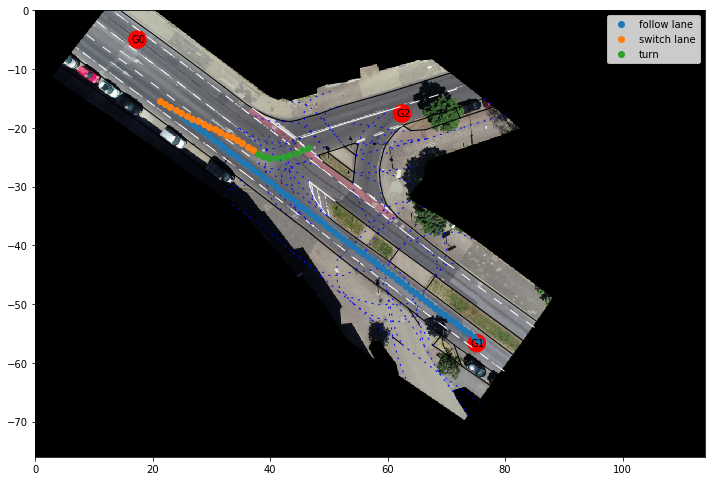

In [12]:



plt.figure(figsize=(12, 12))
scenario.plot()
plt.plot(follow_maneuver.path[:, 0],
         follow_maneuver.path[:, 1], 'o', label='follow lane')
plt.plot(switch_maneuver.path[:, 0],
         switch_maneuver.path[:, 1], 'o', label='switch lane')
plt.plot(turn_maneuver.path[:, 0],
         turn_maneuver.path[:, 1], 'o', label='turn')
plt.legend()

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


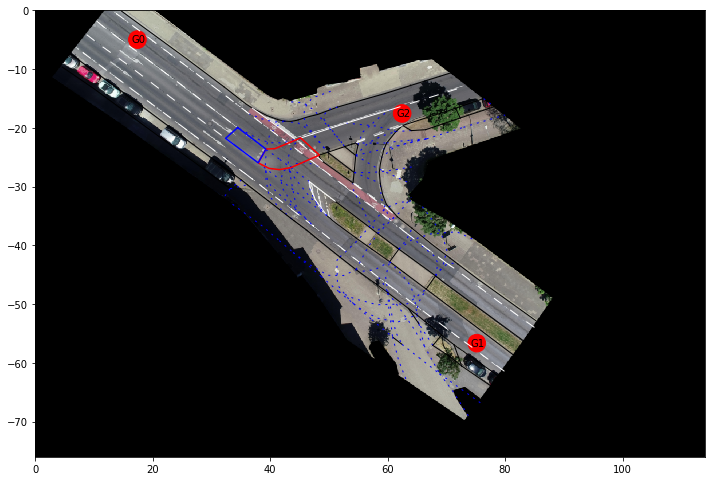

In [13]:
l = feature_extractor.lanelet_map.laneletLayer.get(-1770701)
l_prev = feature_extractor.routing_graph.previous(l)[0]
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot(l, color='red', )
LaneletHelpers.plot(l_prev, color='blue')

In [14]:
np.linalg.norm(np.diff(maneuver.path, axis=0), axis=1)

array([1.02678521, 1.0269251 , 1.02691157, 1.02675325, 1.02654002,
       1.02644306, 1.02661818, 1.02679287, 1.02675613, 1.02667902,
       1.02664746, 1.02670551, 1.02670981, 1.02663877, 1.02670216,
       1.02664674, 1.02669968, 1.02668485, 1.02667162, 1.02672099,
       1.02663334, 1.02652922, 1.0301167 , 1.02647047, 1.01449414,
       1.03011674, 1.04402149, 1.01699323, 1.02284611, 1.03407746,
       1.0287354 , 1.02347484, 1.02691483, 1.02769988, 1.02611663,
       1.0268541 , 1.02664005, 1.02670231, 1.02668637, 1.02667203,
       1.02668549, 1.0266633 , 1.02681106, 1.02702076, 1.026688  ,
       1.02613884, 1.02630841, 1.0268898 , 1.02718491, 1.02694193])

In [15]:
agent_id = 0
frame = Frame(0)
heading = -5/6*np.pi
v_x = 10 * np.cos(heading)
v_y = 10 * np.sin(heading)

state = AgentState(0, 55.78, -16.85, v_x, v_y, -5/6*np.pi, 0, 0, 10, 0, 0, 0)
frame.add_agent_state(0, state)

config = ManeuverConfig({'termination_point': (43.98, -19.90),
                         'initial_lanelet_id': -1770710,
                         'final_lanelet_id': -1770832,
                         'exit_lanelet_id': -1770731})
maneuver = GiveWay(agent_id, frame, feature_extractor, config)


2.4755744921799048
[]
[]


ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


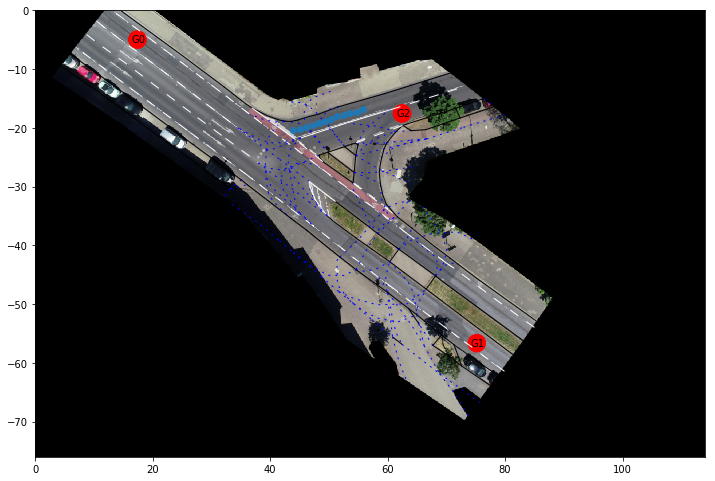

In [16]:
plt.figure(figsize=(12, 12))
scenario.plot()

maneuver.path
plt.plot(maneuver.path[:, 0],
         maneuver.path[:, 1], 'o', label='give way')

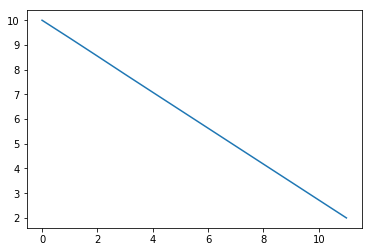

In [17]:
plt.plot(maneuver.velocity)

In [18]:
# give way with oncoming vehicles

# ego vehicle
agent_id = 0
frame = Frame(0)
heading = -5/6*np.pi
v_x = 10 * np.cos(heading)
v_y = 10 * np.sin(heading)
state = AgentState(0, 55.78, -16.85, v_x, v_y, heading, 0, 0, 10, 0, 0, 0)
frame.add_agent_state(agent_id, state)

# oncoming vehicle
agent_id = 1
heading = 3/4*np.pi
v_x = 10 * np.cos(heading)
v_y = 10 * np.sin(heading)
state = AgentState(0, 71.45, -45.34, v_x, v_y, heading, 0, 0, 10, 0, 0, 0)
frame.add_agent_state(agent_id, state)

config = ManeuverConfig({'termination_point': (43.98, -19.90),
                         'initial_lanelet_id': -1770710,
                         'final_lanelet_id': -1770832,
                         'exit_lanelet_id': -1770731})
maneuver = GiveWay(0, frame, feature_extractor, config)


2.4755744921799048
[3.7913321244789513]
[3.7913321244789513]


ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


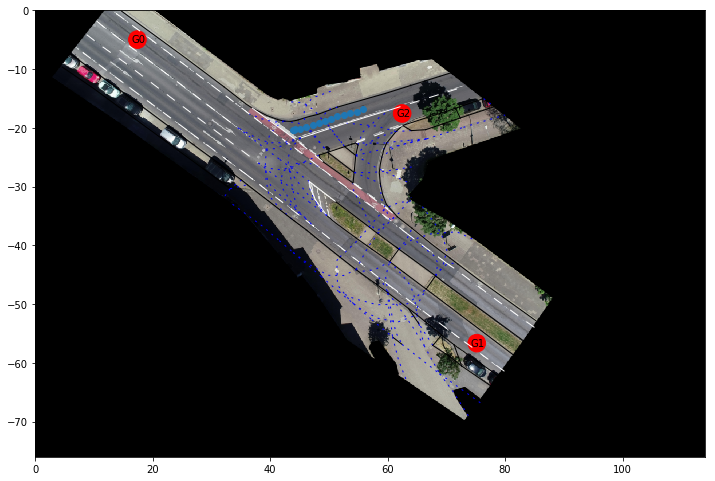

In [19]:
plt.figure(figsize=(12, 12))
scenario.plot()

maneuver.path
plt.plot(maneuver.path[:, 0],
         maneuver.path[:, 1], 'o', label='give way')

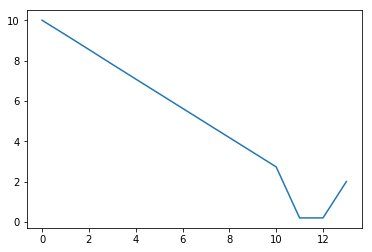

In [20]:
plt.plot(maneuver.velocity)

In [21]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1770832)
following_lanelets = feature_extractor.routing_graph.following(lanelet)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


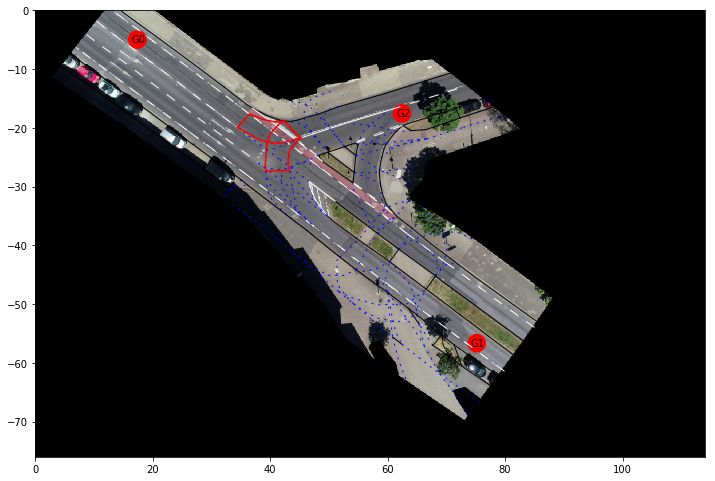

In [22]:
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot(following_lanelets[0])
LaneletHelpers.plot(following_lanelets[1])

In [23]:
LaneletHelpers.virtual(following_lanelets[0])

True

In [24]:
LaneletHelpers.virtual(following_lanelets[1])

True

In [25]:
# traverse until next lanelet has multiple predecessors OR
lanelet_path = []
l = following_lanelets[1]

while LaneletHelpers.virtual(l):
    print(len(feature_extractor.routing_graph.previous(l)))
    lanelet_path.append(l)
    l = feature_extractor.routing_graph.following(l)[0]


1
1


In [26]:
lanelet_path[0].id

-1770846

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


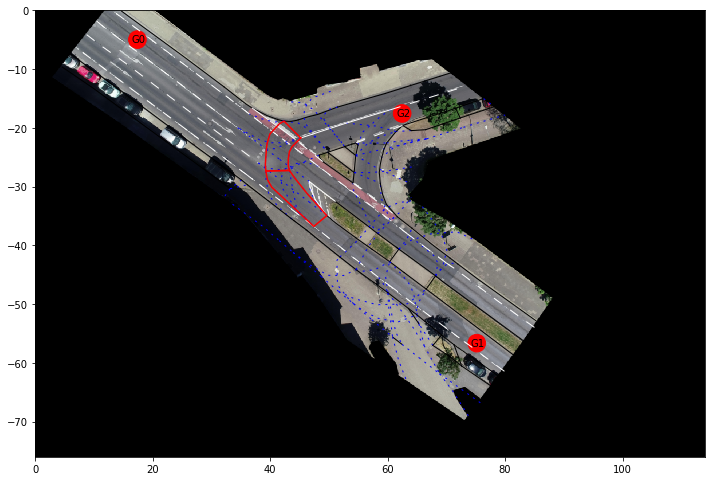

In [27]:
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(lanelet_path)

In [28]:
scenario_cross = Scenario.load('../scenario_config/bendplatz.json')

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


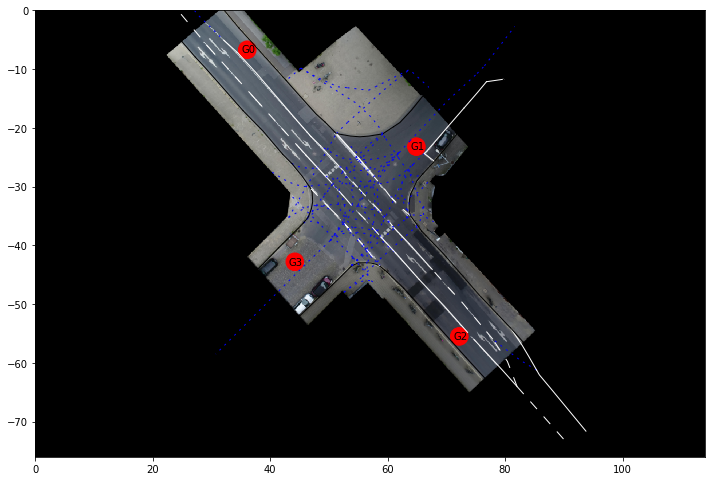

In [29]:
plt.figure(figsize=(12, 12))
scenario_cross.plot()

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']
ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


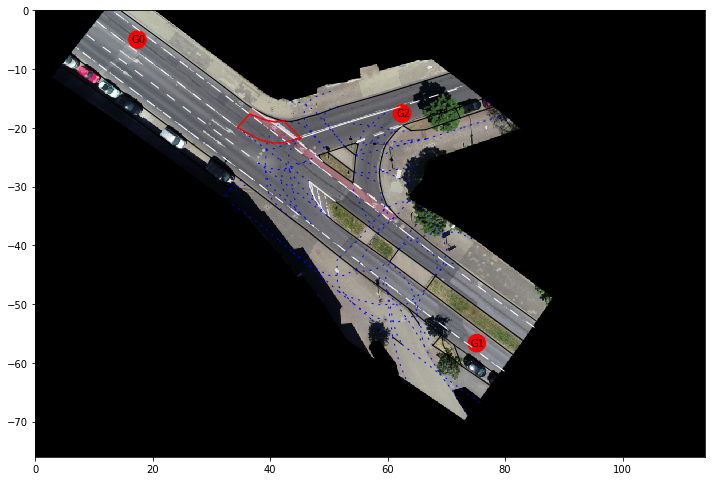

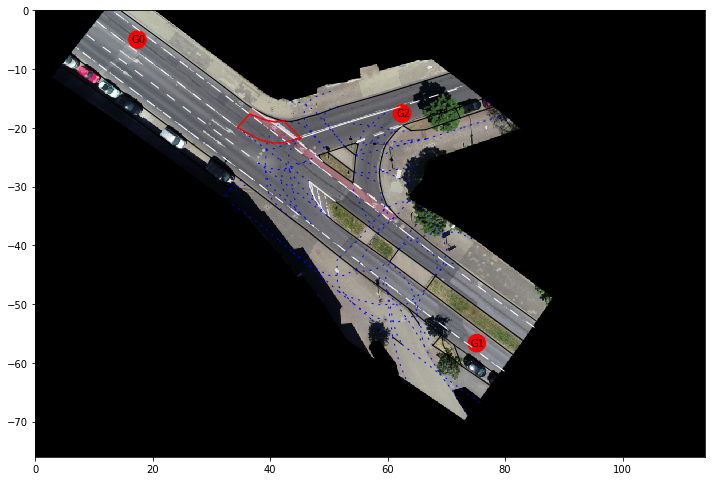

In [30]:
lanelet_path = feature_extractor.get_junction_path(following_lanelets[0])
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(lanelet_path)
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(lanelet_path)

In [31]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1770784)
following_lanelets = feature_extractor.routing_graph.following(lanelet)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


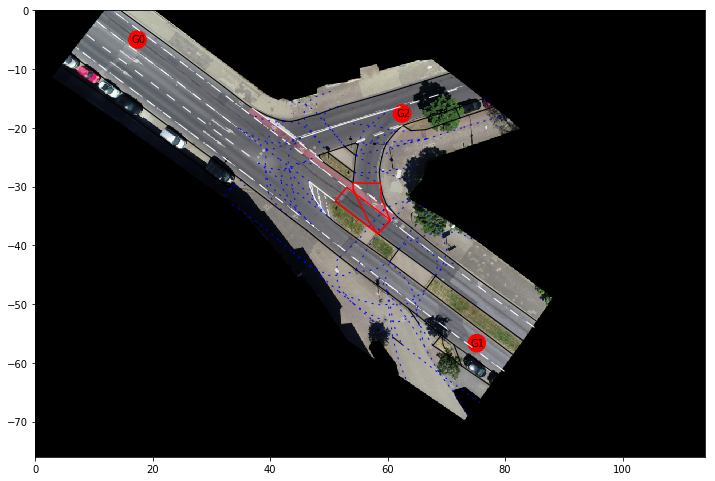

In [32]:
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(following_lanelets)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


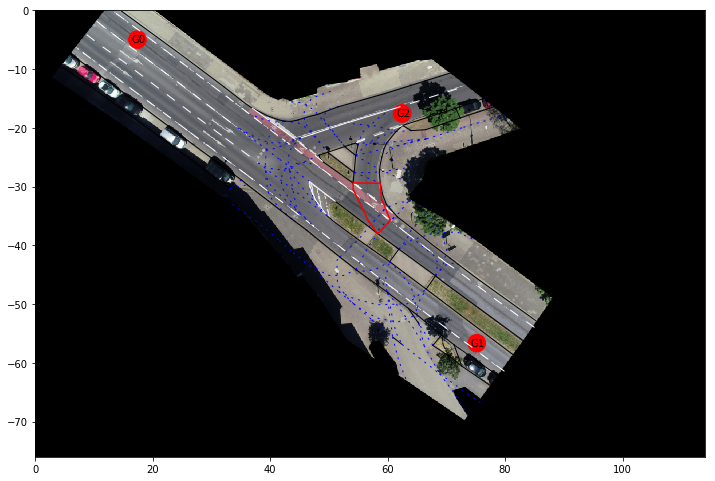

In [33]:
lanelet_path = feature_extractor.get_junction_path(following_lanelets[0])
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(lanelet_path)

In [34]:
crossed_lanelets, crossing_points = feature_extractor.get_lines_crossed(lanelet_path[0])

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


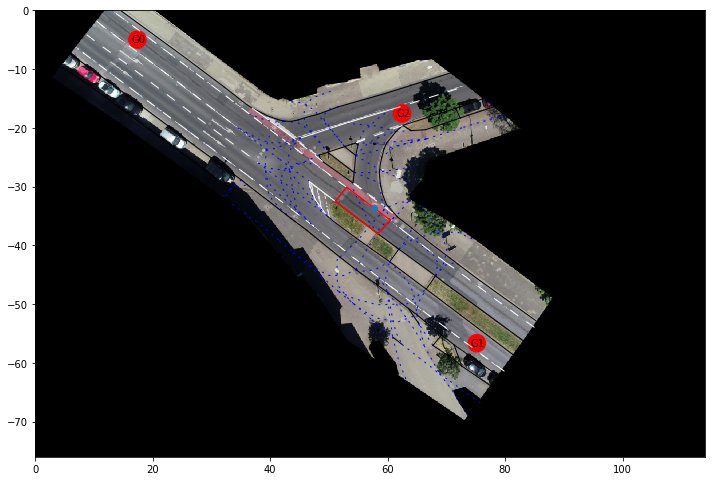

In [35]:
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot_path(crossed_lanelets)
plt.plot(crossing_points[0].x, crossing_points[0].y, 'o')

In [36]:
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)

['exit_right', 'continue']


ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


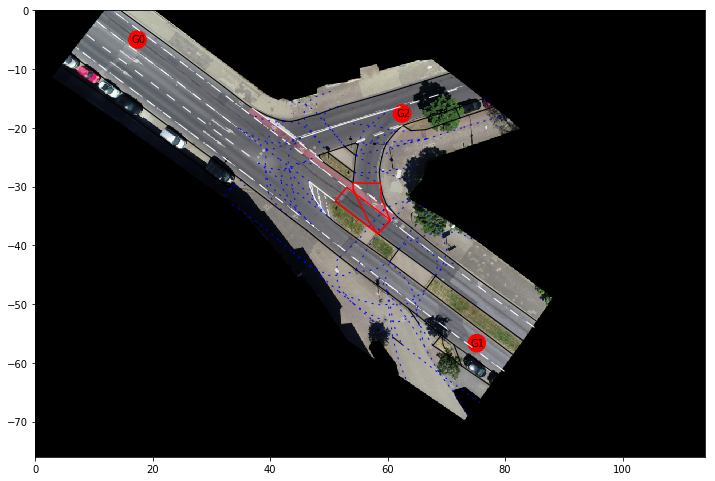

In [37]:
plt.figure(figsize=(12, 12))
scenario.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_path)

In [38]:
entry_lanelets = feature_extractor.routing_graph.following(lanelet)

ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


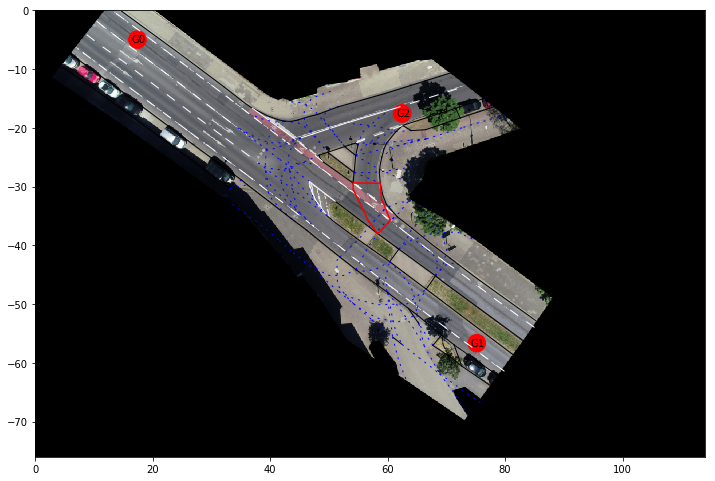

In [39]:
plt.figure(figsize=(12, 12))
scenario.plot()
LaneletHelpers.plot(entry_lanelets[0])

['exit_left']
ID -1770527: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'arrow']


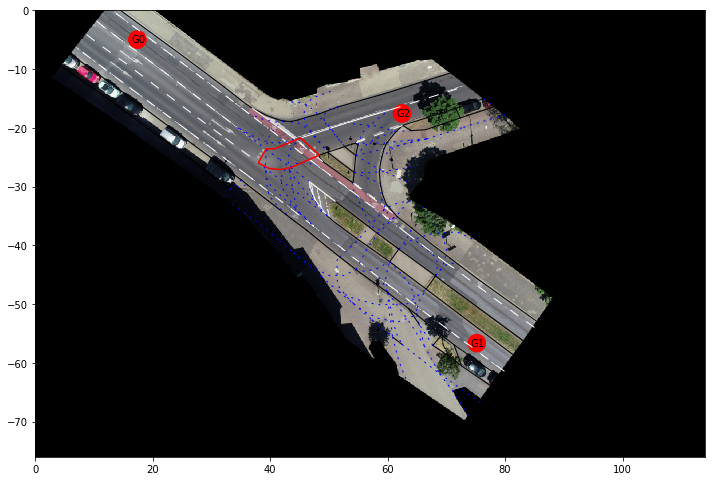

In [40]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1770712)
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)
plt.figure(figsize=(12, 12))
scenario.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_path)

['enter_right', 'enter_left', 'cross']
ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


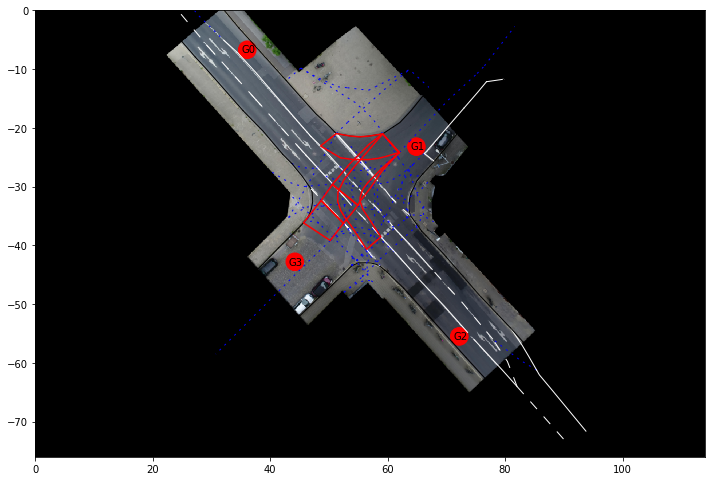

In [41]:
feature_extractor = FeatureExtractor(scenario_cross.lanelet_map)
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766597)
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)
plt.figure(figsize=(12, 12))
scenario_cross.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_path)

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


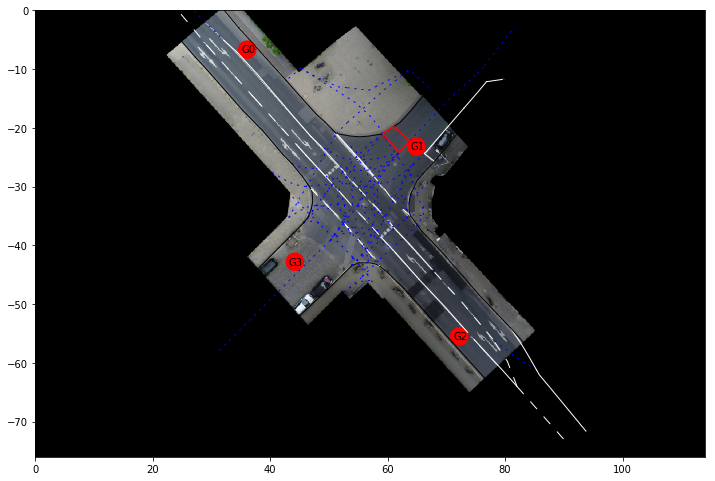

In [42]:
plt.figure(figsize=(12, 12))
scenario_cross.plot()

lanelets = feature_extractor.routing_graph.besides(lanelet)
LaneletHelpers.plot_path(lanelets)

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


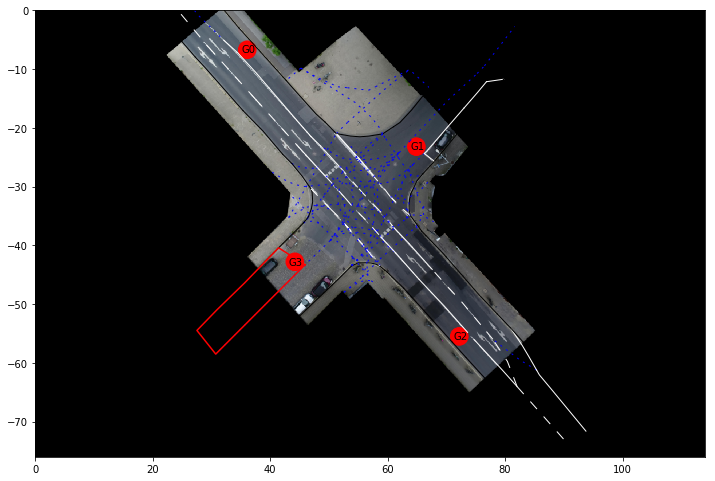

In [43]:

lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766588)
plt.figure(figsize=(12, 12))
scenario_cross.plot()

LaneletHelpers.plot(lanelet)
# lanelets = feature_extractor.routing_graph.besides(lanelet)
# LaneletHelpers.plot_path(lanelets)

In [44]:
feature_extractor.routing_graph.adjacentRight(lanelet)

In [45]:
feature_extractor.routing_graph.besides(lanelet)

In [46]:
# get all lanelets in road

# for each lanelet in road, get adjacent ones
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766629)
road_lanelets = {lanelet}
frontier = {lanelet}

while len(frontier) > 0:
    print(len(frontier))
    current_lanelet = frontier.pop()
    for l in feature_extractor.routing_graph.passableLaneletSubmap().laneletLayer:
        if (not l in road_lanelets and LaneletHelpers.connected(current_lanelet, l)):
            _, intersection_point = feature_extractor.lanelet_crosses_line(l)
            if intersection_point is None:
                frontier.add(l)
                road_lanelets.add(l)


1
3
4
5
6
7
7
7
7
8
9
9
10
9
9
9
9
8
7
8
7
8
7
6
5
5
4
5
5
5
4
5
5
6
5
5
5
5
5
5
4
4
3
3
3
3
3
2
1
1


In [47]:
road_lanelets

{<lanelet2.core.Lanelet at 0x7f1d37245f30>,
 <lanelet2.core.Lanelet at 0x7f1d372452d0>}

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


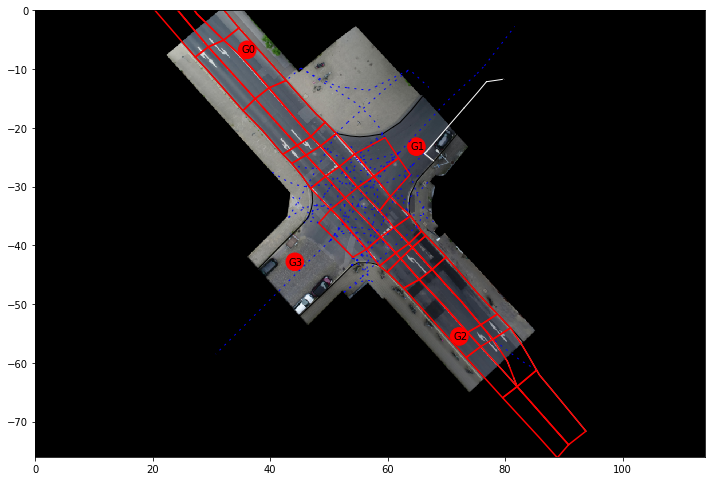

In [48]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766629)
plt.figure(figsize=(12, 12))
scenario_cross.plot()
for l in road_lanelets:
    LaneletHelpers.plot(l)

In [49]:
{1,2,3}.pop()

1

In [50]:
# get non-virtual neighbours

# previous
previous = feature_extractor.routing_graph.previous(lanelet)
for l in previous:
    if not LaneletHelpers.virtual(l) and not l in road_lanelets:
        frontier.add(l)
        road_lanelets.add(l)

# following
following = feature_extractor.routing_graph.following(lanelet)
for l in previous:
    if not LaneletHelpers.virtual(l) and not l in road_lanelets:
        frontier.add(l)
        road_lanelets.add(l)
        
# adjacent


ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


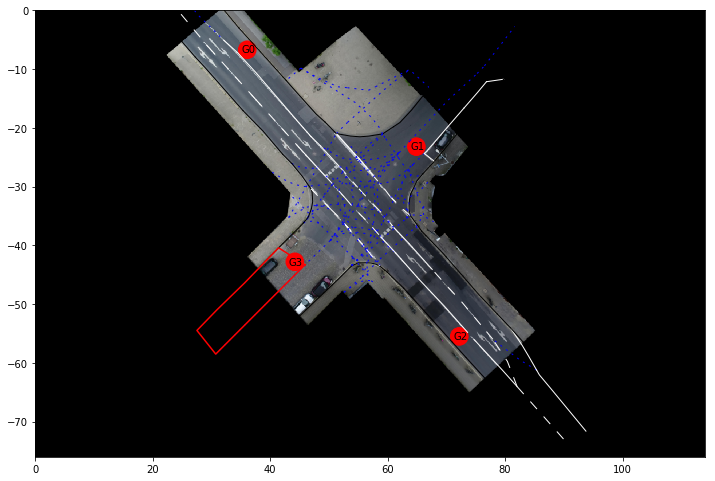

In [51]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766588)
plt.figure(figsize=(12, 12))
scenario_cross.plot()

LaneletHelpers.plot(lanelet)

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


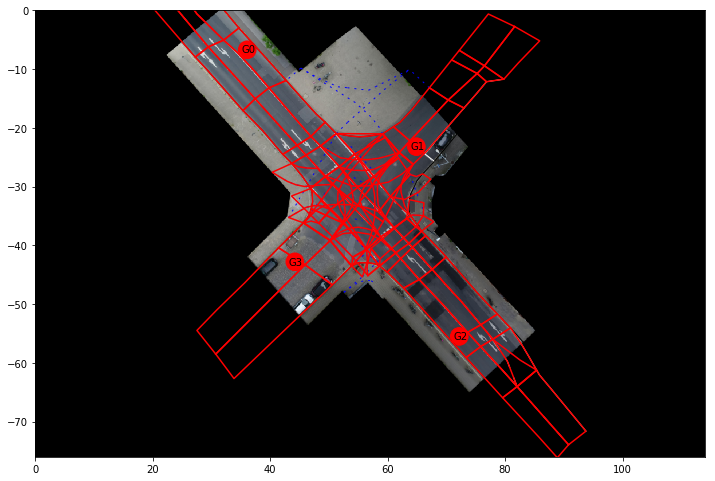

In [52]:
plt.figure(figsize=(12, 12))
scenario_cross.plot()

for l in feature_extractor.routing_graph.passableLaneletSubmap().laneletLayer:
    if feature_extractor.traffic_rules.canPass(l):
        
        LaneletHelpers.plot(l)

In [53]:
l1 = feature_extractor.lanelet_map.laneletLayer.get(-1766619)
#should be beside 
l2 = feature_extractor.lanelet_map.laneletLayer.get(-1766618)

In [54]:
l1

In [55]:
l2

In [56]:
LaneletHelpers.beside(l1, l2)

True

ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


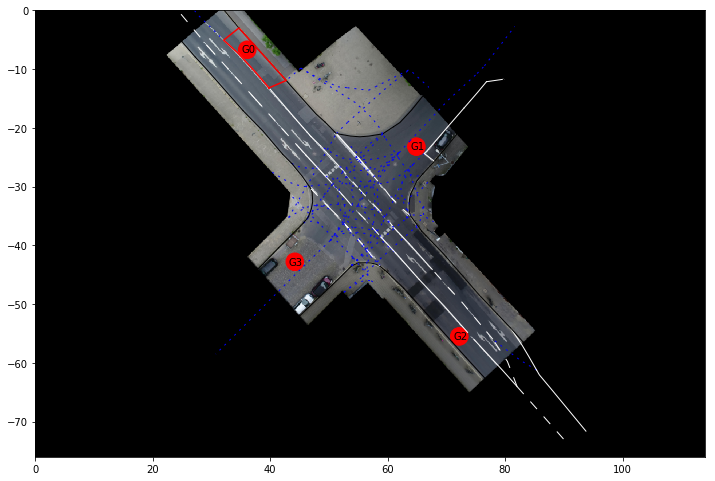

In [57]:
plt.figure(figsize=(12, 12))
scenario_cross.plot()

LaneletHelpers.plot(l1)
#LaneletHelpers.plot(l2)

In [58]:
l1.leftBound.id

-1766342

In [59]:
l2.leftBound.id

-1766342

In [60]:
l1.leftBound ==l2.leftBound

False

In [61]:
l1.leftBound.id == l2.leftBound.id

True

In [62]:
lanelet.centerline[0]

['exit_right', 'continue']
ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


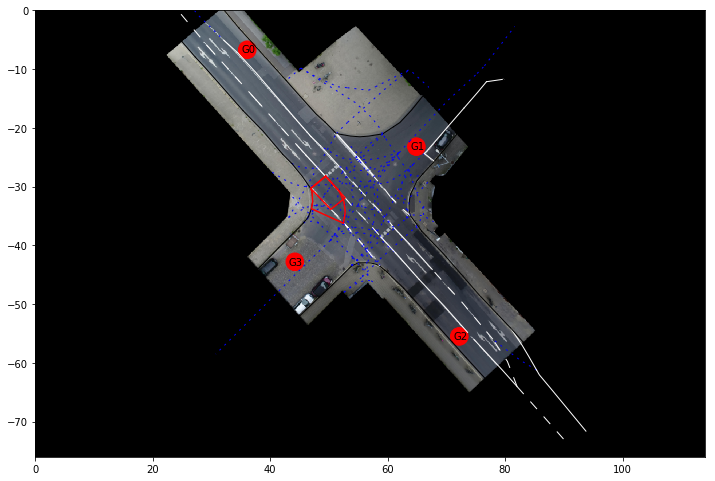

In [63]:
feature_extractor = FeatureExtractor(scenario_cross.lanelet_map)
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766629)
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)
plt.figure(figsize=(12, 12))
scenario_cross.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_path)

['continue']
ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


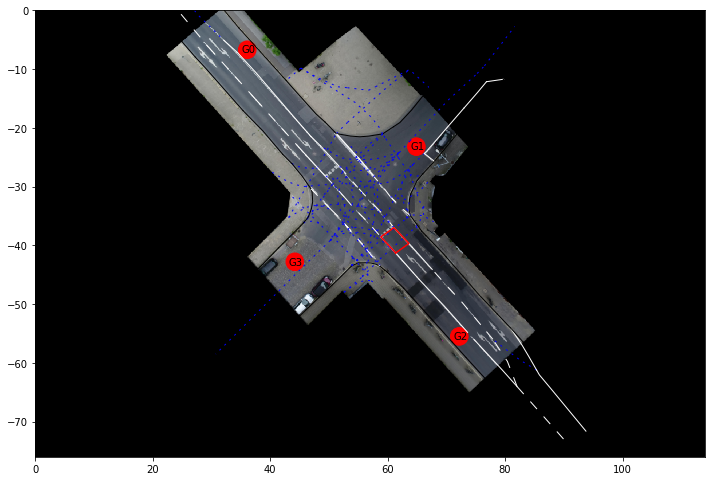

In [64]:
feature_extractor = FeatureExtractor(scenario_cross.lanelet_map)
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766725)
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)
plt.figure(figsize=(12, 12))
scenario_cross.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_paths[0])

['exit_right', 'continue']
ID -1766567: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall', 'fence', 'arrow']


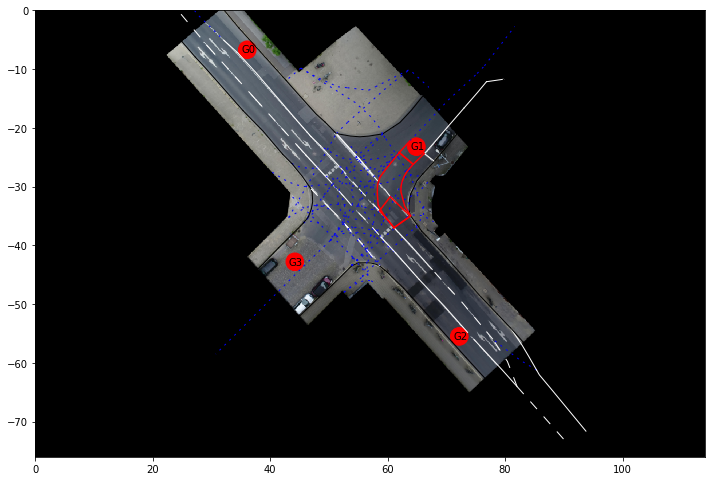

In [65]:
feature_extractor = FeatureExtractor(scenario_cross.lanelet_map)
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1766689)
junction_paths, branch_types = feature_extractor.get_branch_types(lanelet)
print(branch_types)
plt.figure(figsize=(12, 12))
scenario_cross.plot()
for junction_path in junction_paths:
    LaneletHelpers.plot_path(junction_path)

In [66]:
junction_paths

[[<lanelet2.core.ConstLanelet at 0x7f1d372453f0>,

ID -1769430: Linestring type must be specified
ID -1769522: Linestring type must be specified
ID -1769523: Linestring type must be specified
ID -1769491: Linestring type must be specified
ID -1769404: Linestring type must be specified
ID -1769399: Linestring type must be specified
ID -1769368: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall']


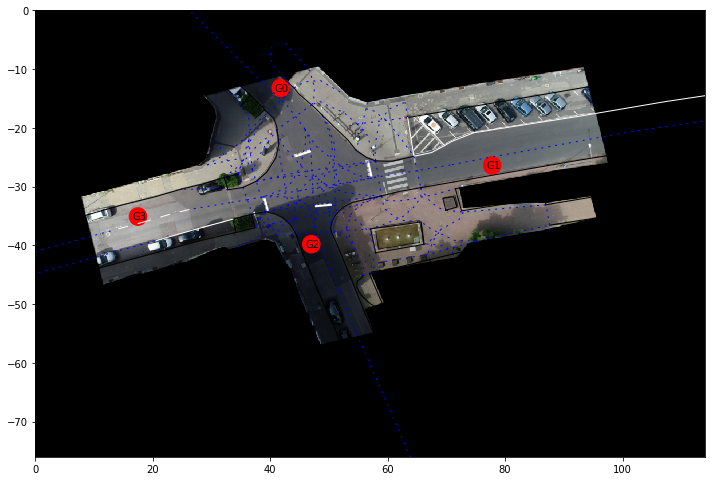

In [67]:
plt.figure(figsize=(12, 12))
scenario_frankenberg = Scenario.load('../scenario_config/frankenberg.json')
scenario_frankenberg.plot()

In [68]:
feature_extractor = FeatureExtractor(scenario_frankenberg.lanelet_map)

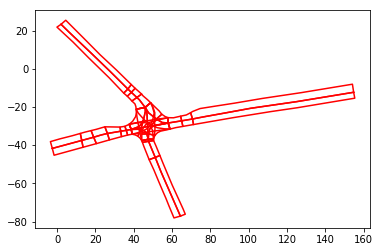

In [69]:
lanelet = feature_extractor.lanelet_map.laneletLayer.get(-1769528)
road_lanelets = feature_extractor.get_road_lanelets(lanelet)

for l in road_lanelets:
    LaneletHelpers.plot(l)

In [70]:
# perhaps lines are not road edges? check for stop lines as well
#all should be cross road, endter left, enter right?
feature_extractor.lanelet_map.regulatoryElementLayer

In [71]:
row = list(feature_extractor.lanelet_map.regulatoryElementLayer)[0]

In [72]:
[x for x in row.attributes]

[(subtype, right_of_way), (type, regulatory_element)]

In [73]:
row.rightOfWayLanelets()

In [74]:
row.yieldLanelets()

In [75]:
lanelet.regulatoryElements

[]

ID -1769430: Linestring type must be specified
ID -1769522: Linestring type must be specified
ID -1769523: Linestring type must be specified
ID -1769491: Linestring type must be specified
ID -1769404: Linestring type must be specified
ID -1769399: Linestring type must be specified
ID -1769368: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall']


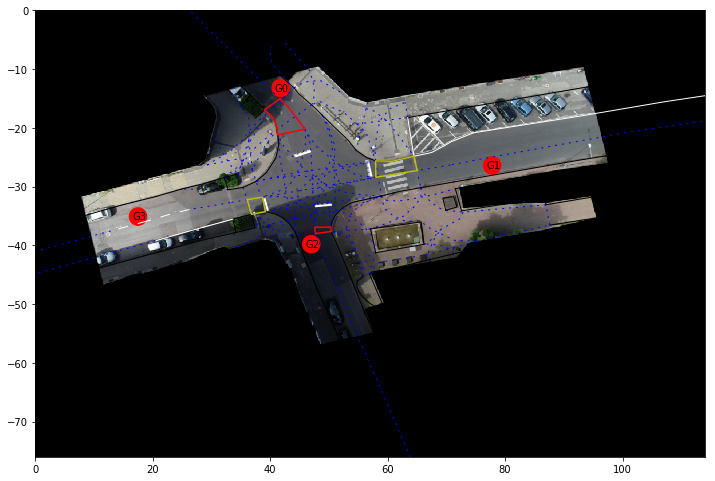

In [76]:
plt.figure(figsize=(12, 12))
scenario_frankenberg.plot()
for l in row.rightOfWayLanelets():
    LaneletHelpers.plot(l, color='y')
for l in row.yieldLanelets():
    LaneletHelpers.plot(l)

In [77]:
lanelet = row.yieldLanelets()[0]

In [78]:
lanelet.regulatoryElements

[]

ID -1769430: Linestring type must be specified
ID -1769522: Linestring type must be specified
ID -1769523: Linestring type must be specified
ID -1769491: Linestring type must be specified
ID -1769404: Linestring type must be specified
ID -1769399: Linestring type must be specified
ID -1769368: Linestring type must be specified
Found the following unknown types, did not plot them: ['wall']


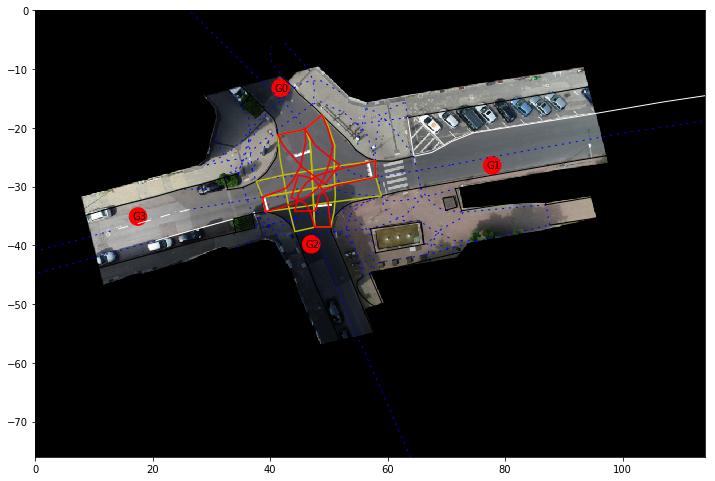

In [79]:
row = list(feature_extractor.lanelet_map.regulatoryElementLayer)[1]
plt.figure(figsize=(12, 12))
scenario_frankenberg.plot()
for l in row.rightOfWayLanelets():
    LaneletHelpers.plot(l, color='y')
for l in row.yieldLanelets():
    LaneletHelpers.plot(l)

In [80]:
lanelet = row.yieldLanelets()[0]